<span>
<img src="img/cdlib_new.png" width="120px" align="right"/>
</span>
<span>
<b>Author:</b> <a href="http://about.giuliorossetti.net">Giulio Rossetti</a><br/>
<b>Python version:</b>  3.7<br/>
<b>CDlib version:</b>  0.1.10<br/>
<b>Last update:</b> 16/02/2021
</span>

In [1]:
import warnings
from collections import Counter
import numpy as np
import pandas as pd
import networkx as nx
warnings.filterwarnings('ignore')

In [2]:
def mesure_graph(DG):
    print('The Network DG has:\n Number of Nodes = ',DG.number_of_nodes(),'\n Number of Edges = ',DG.number_of_edges(),'\n')
    print('Average degree of "edges, links" = ',sum(dict(DG.degree()).values())/float(len(DG)))
    print('Is a Directed Network ?',DG.is_directed())

<a id='top'></a>
# Cap 8:Community Discovery*

In this notebook are introduced the main steps for the extraction and topological analysis of communities.

**Note:** this notebook is purposely not 100% comprehensive, it only discusses the basic things you need to get started. For all the details, algorithm/methods/evaluation facilities available in ``CDlib``, please refer to the official [documentation](https://cdlib.readthedocs.io) and the dedicated notebook appendix.

## Table of Contents

1. [Community Discovery Workflow](#workflow)
    1. [Graph Creation](#graph)
    2. [Community Discovery algorithm(s) selection and configuration ](#model)
    3. [Clustering Evaluation (Fitness functions)](#fitness)
    4. [Clustering Evaluation (Comparison)](#comparison)
    5. [Community/Statistics Visualization](#visualization)
    6. [Qualitative evaluation](#qualitative)
    7. [Ground Truth evaluation](#gt)
    8. [Advanced facilities: Pooling and Optimization](#advanced)

In [3]:
import cdlib

### Subreddit Data


In [4]:
df = pd.read_csv("scraping data/data/data_subreddit_direct.csv",index_col=0)
df.head()

,parent,to,interactions,crossposts,date,weights
0,nature,environment,1746.0,1,1.619228e+09,7.465655
1,nature,EcoNewsNetwork,154.0,13,1.615282e+09,5.043425
2,nature,PublicLands,3.0,1,1.619177e+09,1.386294
3,nature,EndangeredSpecies,28.0,2,1.618449e+09,3.367296
4,nature,animalimpact,5.0,3,1.615263e+09,1.791759


In [5]:
#delete the columns 
columns2remove = ['date']
df.drop(columns2remove, inplace=True, axis=1)
df.head()


,parent,to,interactions,crossposts,weights
0,nature,environment,1746.0,1,7.465655
1,nature,EcoNewsNetwork,154.0,13,5.043425
2,nature,PublicLands,3.0,1,1.386294
3,nature,EndangeredSpecies,28.0,2,3.367296
4,nature,animalimpact,5.0,3,1.791759


<a id='workflow'></a>
## Community Discovery Workflow ([to top](#top))

The standard workflow can be summarized as:
- Network Creation
- Community Discovery algorithm(s) selection and configuration
- Clustering(s) evaluation (Fitness functions)
- Clustering(s) evaluation (Comparisons)
- Community/Statistics Visualization

In this section we will observe how to templating such workflow applying two classic network clustering algorithms: Label Propagation and Leiden.
All analysis will be performed using ``CDlib``.

<a id="graph"></a>
### Graph object creation ([to top](#top))

As a first step we need to define the network topology that will be used as playground to study diffusive phenomena.

``CDlib`` natively supports both [``networkx``](https://networkx.github.io) and [``igraph``](https://igraph.org/python/) data structures.

In our examples, for the sake of simplicity, we will use ``networkx`` undirected graphs. 

### Undirected Graph
The name of indirected Graph is "g"

In [6]:
g=[]
g = nx.from_pandas_edgelist(df, source='parent', target='to',
                                     edge_attr=['crossposts', 'weights'],
                                     create_using=nx.Graph)
mesure_graph(g)

The Network DG has:
 Number of Nodes =  24819 
 Number of Edges =  104284 

Average degree of "edges, links" =  8.403561787340344
Is a Directed Network ? False


### Directed Graph
The name of indirected Graph is "dg"

In [7]:
dg=[]

dg = nx.from_pandas_edgelist(df, source='parent', target='to',
                                     edge_attr=['crossposts', 'weights'],
                                     create_using=nx.DiGraph)
mesure_graph(dg)

The Network DG has:
 Number of Nodes =  24819 
 Number of Edges =  107094 

Average degree of "edges, links" =  8.63000120875136
Is a Directed Network ? True


<a id="model"></a>
### Community Discovery algorithm(s) selection and configuration ([to top](#top))

After having defined the graph, we can select the algorithm(s) to partition it.

In [8]:
from cdlib import algorithms

### Leiden
Community Discovery algorithm selection and configuration 

In [9]:
leiden_coms = algorithms.leiden(g)

All Community Discovery algorithms generate as result an object that implements a concrete instance of the ``Clustering`` datatype.

In particular, both Louvain and Label Propagation returns a ``NodeClustering`` object having the following propterties:

In [10]:
print('Clustering algorithm name is',leiden_coms.method_name,'\n') 
print('Clustering parameters',leiden_coms.method_parameters)


Clustering algorithm name is Leiden 

Clustering parameters {'initial_membership': None, 'weights': None}


In [11]:
Leiden_clusters=leiden_coms.communities # Identified Clustering
Leiden_clusters

[['Fuck_This_Guy',
  'organizedhealing',
  'TheFightThatMatters',
  'WomensRightsNews',
  'worldnews',
  'indepthstories',
  'blackladies',
  'BigTent',
  'BigAgro',
  'DoomsdayNow',
  'DoomsdayBook',
  'DivineRightOfKings',
  'LockCarbon',
  'Toadbook',
  'SGU',
  'GoodRisingTweets',
  'left_urbanism',
  'EnoughMuskSpam',
  'patient_hackernews',
  'canadaleft',
  'KochWatch',
  'TheEndOfHumanityShow',
  'soundsaboutright',
  'economy',
  'CapitalismInDecay',
  'Allopatria',
  'AnythingGoesNews',
  'ABoringDystopia',
  'Indigenous',
  'Ohio',
  'WarOnEarth',
  'alltheleft',
  'terrifyingstatistics',
  'Communalists',
  'GreenConsumersUnion',
  'Futurology',
  'michigandemocrats',
  'climateskeptics',
  'SunriseMovement',
  'Kossacks_for_Sanders',
  'FuckNestle',
  'collapse',
  'lostgeneration',
  'AmazoNope',
  'ArmedEnvironmentalism',
  'uspolitics',
  'HC_Capitalism',
  'AtheismComedy',
  'LocalismEngland',
  'IndianCountry',
  'UnfuckTheWorld',
  'Corruption',
  'workthatreconnects

In [12]:
print('Wehter the clustering is overlapping or not = ',leiden_coms.overlap,'\n') 
print('Percentage of nodes covered by the clustering = ',leiden_coms.node_coverage,'\n') 

Wehter the clustering is overlapping or not =  False 

Percentage of nodes covered by the clustering =  1.0 



Moreover, ``Clustering`` object allow also for the generation of a JSON representation of the results

In [13]:
Leiden_comunity_js=leiden_coms.to_json()
Leiden_comunity_js

'{"communities": [["Fuck_This_Guy", "organizedhealing", "TheFightThatMatters", "WomensRightsNews", "worldnews", "indepthstories", "blackladies", "BigTent", "BigAgro", "DoomsdayNow", "DoomsdayBook", "DivineRightOfKings", "LockCarbon", "Toadbook", "SGU", "GoodRisingTweets", "left_urbanism", "EnoughMuskSpam", "patient_hackernews", "canadaleft", "KochWatch", "TheEndOfHumanityShow", "soundsaboutright", "economy", "CapitalismInDecay", "Allopatria", "AnythingGoesNews", "ABoringDystopia", "Indigenous", "Ohio", "WarOnEarth", "alltheleft", "terrifyingstatistics", "Communalists", "GreenConsumersUnion", "Futurology", "michigandemocrats", "climateskeptics", "SunriseMovement", "Kossacks_for_Sanders", "FuckNestle", "collapse", "lostgeneration", "AmazoNope", "ArmedEnvironmentalism", "uspolitics", "HC_Capitalism", "AtheismComedy", "LocalismEngland", "IndianCountry", "UnfuckTheWorld", "Corruption", "workthatreconnects", "Permanence", "MachineThatMakesMoney", "TechOfTheFuture", "StopFossilFuels", "Dystop

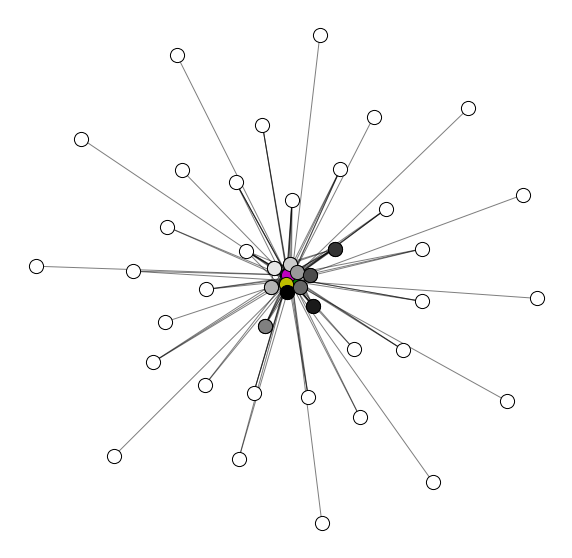

In [14]:
from cdlib import viz
viz.plot_community_graph(g, leiden_coms, figsize=(10, 10))

### Louvain
Community Discovery algorithm selection and configuration 

In [15]:
louv_coms = algorithms.louvain(g, weight='weights',randomize=None)

In [16]:
print('Clustering algorithm name is',louv_coms.method_name,'\n') 
print('Clustering parameters',louv_coms.method_parameters)

Clustering algorithm name is Louvain 

Clustering parameters {'weight': 'weights', 'resolution': 1.0, 'randomize': None}


In [17]:
print('Identified Clustering with "Louvain", \n')
louv_clusters=leiden_coms.communities 
louv_clusters

Identified Clustering with "Louvain", 



[['Fuck_This_Guy',
  'organizedhealing',
  'TheFightThatMatters',
  'WomensRightsNews',
  'worldnews',
  'indepthstories',
  'blackladies',
  'BigTent',
  'BigAgro',
  'DoomsdayNow',
  'DoomsdayBook',
  'DivineRightOfKings',
  'LockCarbon',
  'Toadbook',
  'SGU',
  'GoodRisingTweets',
  'left_urbanism',
  'EnoughMuskSpam',
  'patient_hackernews',
  'canadaleft',
  'KochWatch',
  'TheEndOfHumanityShow',
  'soundsaboutright',
  'economy',
  'CapitalismInDecay',
  'Allopatria',
  'AnythingGoesNews',
  'ABoringDystopia',
  'Indigenous',
  'Ohio',
  'WarOnEarth',
  'alltheleft',
  'terrifyingstatistics',
  'Communalists',
  'GreenConsumersUnion',
  'Futurology',
  'michigandemocrats',
  'climateskeptics',
  'SunriseMovement',
  'Kossacks_for_Sanders',
  'FuckNestle',
  'collapse',
  'lostgeneration',
  'AmazoNope',
  'ArmedEnvironmentalism',
  'uspolitics',
  'HC_Capitalism',
  'AtheismComedy',
  'LocalismEngland',
  'IndianCountry',
  'UnfuckTheWorld',
  'Corruption',
  'workthatreconnects

In [18]:
print('Wehter the clustering is overlapping or not = ',louv_coms.overlap,'\n') 
print('Percentage of nodes covered by the clustering = ',louv_coms.node_coverage,'\n') 

Wehter the clustering is overlapping or not =  False 

Percentage of nodes covered by the clustering =  1.0 



In [19]:
louv_comunity_js=leiden_coms.to_json()
louv_comunity_js

'{"communities": [["Fuck_This_Guy", "organizedhealing", "TheFightThatMatters", "WomensRightsNews", "worldnews", "indepthstories", "blackladies", "BigTent", "BigAgro", "DoomsdayNow", "DoomsdayBook", "DivineRightOfKings", "LockCarbon", "Toadbook", "SGU", "GoodRisingTweets", "left_urbanism", "EnoughMuskSpam", "patient_hackernews", "canadaleft", "KochWatch", "TheEndOfHumanityShow", "soundsaboutright", "economy", "CapitalismInDecay", "Allopatria", "AnythingGoesNews", "ABoringDystopia", "Indigenous", "Ohio", "WarOnEarth", "alltheleft", "terrifyingstatistics", "Communalists", "GreenConsumersUnion", "Futurology", "michigandemocrats", "climateskeptics", "SunriseMovement", "Kossacks_for_Sanders", "FuckNestle", "collapse", "lostgeneration", "AmazoNope", "ArmedEnvironmentalism", "uspolitics", "HC_Capitalism", "AtheismComedy", "LocalismEngland", "IndianCountry", "UnfuckTheWorld", "Corruption", "workthatreconnects", "Permanence", "MachineThatMakesMoney", "TechOfTheFuture", "StopFossilFuels", "Dystop

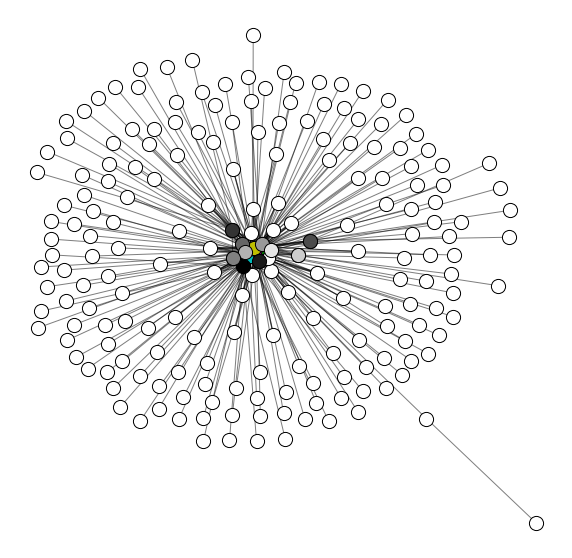

In [20]:
from cdlib import viz
viz.plot_community_graph(g, louv_coms, figsize=(10, 10))

### Label Propagation
Community Discovery algorithm selection and configuration 

In [21]:
lp_coms = algorithms.label_propagation(g)

In [22]:
print('Clustering algorithm name is',lp_coms.method_name,'\n') 
print('Clustering parameters',lp_coms.method_parameters)

Clustering algorithm name is Label Propagation 

Clustering parameters {'': ''}


In [23]:
print('Identified Clustering with "Label Propagation", \n')
lp_clusters=lp_coms.communities 
lp_clusters

Identified Clustering with "Label Propagation", 



[['belarus',
  'upholstery',
  'esHistoria',
  'EUROAESTHETICS',
  'kiwi_bird',
  'Planegea',
  'howdybitch',
  'dumbressive',
  'cuboulder',
  'Frankthesnake',
  'OrlandoFun',
  'atrioc',
  'LittleNightmares',
  'natureporn',
  'blackmagicskillery',
  'CRNA',
  'Pyrex_Love',
  'Lethbridge',
  'Covid19ClimateChange',
  'Fzero',
  'search_and_destroy',
  'ExpandDong',
  'GodofWar',
  'racistpassdenied',
  'daria',
  'Rigging',
  'RedecorHomeDesignGame',
  'COMPLETEANIMEARCHY',
  'NSB_Gaming',
  'Stoicism',
  'Antifurrycrusade',
  'AntiVaxxers',
  'privacymemes',
  'KnottyMemes',
  'TonyHawkitecture',
  'MFDOOMCIRCLEJERK',
  'Milking',
  'badredactions',
  'ccr',
  'dogswhoarecute',
  'interesting',
  'TakeOutTheTrash',
  'spottedinbackground',
  'headlineimproved',
  'ActualHippies',
  'CrackheadCraigslist',
  'UnexpectedKpop',
  'CatsOnPizza',
  'festivals',
  'SuddenlyDragon',
  'GhettoStreetFights',
  'TurtwigGang',
  'archeologyworld',
  'Gangstalking',
  'bicycletouring',
  'HumanT

In [24]:
print('Wehter the clustering is overlapping or not = ',lp_coms.overlap,'\n') 
print('Percentage of nodes covered by the clustering = ',lp_coms.node_coverage,'\n') 

Wehter the clustering is overlapping or not =  False 

Percentage of nodes covered by the clustering =  1.0 



In [25]:
lp_comunity_js=lp_coms.to_json()
lp_comunity_js

'{"communities": [["belarus", "upholstery", "esHistoria", "EUROAESTHETICS", "kiwi_bird", "Planegea", "howdybitch", "dumbressive", "cuboulder", "Frankthesnake", "OrlandoFun", "atrioc", "LittleNightmares", "natureporn", "blackmagicskillery", "CRNA", "Pyrex_Love", "Lethbridge", "Covid19ClimateChange", "Fzero", "search_and_destroy", "ExpandDong", "GodofWar", "racistpassdenied", "daria", "Rigging", "RedecorHomeDesignGame", "COMPLETEANIMEARCHY", "NSB_Gaming", "Stoicism", "Antifurrycrusade", "AntiVaxxers", "privacymemes", "KnottyMemes", "TonyHawkitecture", "MFDOOMCIRCLEJERK", "Milking", "badredactions", "ccr", "dogswhoarecute", "interesting", "TakeOutTheTrash", "spottedinbackground", "headlineimproved", "ActualHippies", "CrackheadCraigslist", "UnexpectedKpop", "CatsOnPizza", "festivals", "SuddenlyDragon", "GhettoStreetFights", "TurtwigGang", "archeologyworld", "Gangstalking", "bicycletouring", "HumanTippyTaps", "darktower", "Dadslist", "Goose", "BigCatGifs", "G0ularte", "Neverwinter", "hey_cr

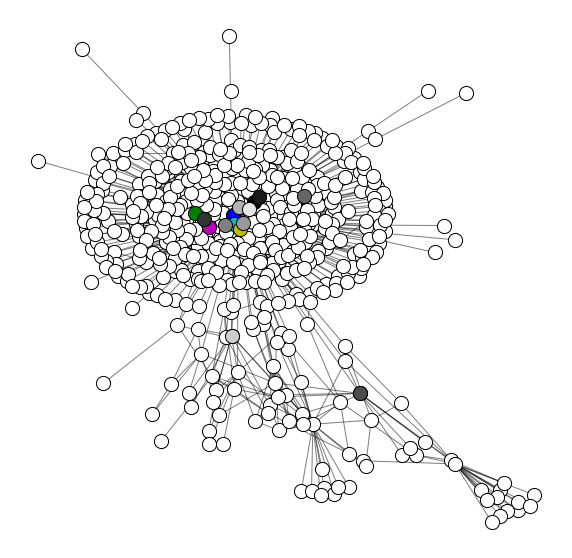

In [27]:
from cdlib import viz
viz.plot_community_graph(g, lp_coms, figsize=(10, 10))

### Infomap
Community Discovery algorithm selection and configuration 

In [28]:
info_coms = algorithms.infomap(g)

In [29]:
print('Clustering algorithm name is',info_coms.method_name,'\n') 
print('Clustering parameters',info_coms.method_parameters)

Clustering algorithm name is Infomap 

Clustering parameters {'': ''}


In [30]:
print('Identified Clustering with "infomap", \n')
info_clusters=info_coms.communities 
info_clusters

Identified Clustering with "infomap", 



[['WTF',
  'Whatcouldgowrong',
  'WinStupidPrizes',
  'IdiotsInCars',
  'AbruptChaos',
  'therewasanattempt',
  'instant_regret',
  'MakeMeSuffer',
  'perfectlycutscreams',
  'ActualPublicFreakouts',
  'worldnewsvideo',
  'ANormalDayInRussia',
  'instantkarma',
  'JusticeServed',
  'KidsAreFuckingStupid',
  'Instantregret',
  'Pikabu',
  'nonononoyes',
  'yesyesyesyesno',
  'SweatyPalms',
  'fightporn',
  'premiuminternet',
  'holdmycosmo',
  'VideosMP4',
  'PraiseTheCameraMan',
  'ActualFreakouts',
  'yourmomshousepodcast',
  'FuckYouKaren',
  'FUCKYOUINPARTICULAR',
  'IdiotsFightingThings',
  'holdmyfeedingtube',
  'IdiotsNearlyDying',
  'holdmybeer',
  'yesyesyesno',
  'tooktoomuch',
  'nevertellmetheodds',
  'Ytqaz2019',
  'MyPeopleNeedMe',
  'OneSecondBeforeDisast',
  'HadToHurt',
  'DownloadVideo',
  'donthelpjustfilm',
  'IrrationalMadness',
  'KGBTR',
  'CrazyFuckingVideos',
  'killthecameraman',
  'gifsthatendtoosoon',
  'HumansAreMetal',
  'ThatLookedExpensive',
  'ItemShop',

In [31]:
print('Wehter the clustering is overlapping or not = ',info_coms.overlap,'\n') 
print('Percentage of nodes covered by the clustering = ',info_coms.node_coverage,'\n') 

Wehter the clustering is overlapping or not =  False 

Percentage of nodes covered by the clustering =  1.0 



In [32]:
info_comunity_js=info_coms.to_json()
info_comunity_js

'{"communities": [["WTF", "Whatcouldgowrong", "WinStupidPrizes", "IdiotsInCars", "AbruptChaos", "therewasanattempt", "instant_regret", "MakeMeSuffer", "perfectlycutscreams", "ActualPublicFreakouts", "worldnewsvideo", "ANormalDayInRussia", "instantkarma", "JusticeServed", "KidsAreFuckingStupid", "Instantregret", "Pikabu", "nonononoyes", "yesyesyesyesno", "SweatyPalms", "fightporn", "premiuminternet", "holdmycosmo", "VideosMP4", "PraiseTheCameraMan", "ActualFreakouts", "yourmomshousepodcast", "FuckYouKaren", "FUCKYOUINPARTICULAR", "IdiotsFightingThings", "holdmyfeedingtube", "IdiotsNearlyDying", "holdmybeer", "yesyesyesno", "tooktoomuch", "nevertellmetheodds", "Ytqaz2019", "MyPeopleNeedMe", "OneSecondBeforeDisast", "HadToHurt", "DownloadVideo", "donthelpjustfilm", "IrrationalMadness", "KGBTR", "CrazyFuckingVideos", "killthecameraman", "gifsthatendtoosoon", "HumansAreMetal", "ThatLookedExpensive", "ItemShop", "WhyWomenLiveLonger", "watchpeoplesurvive", "watchthingsfly", "holdmyjuicebox", 

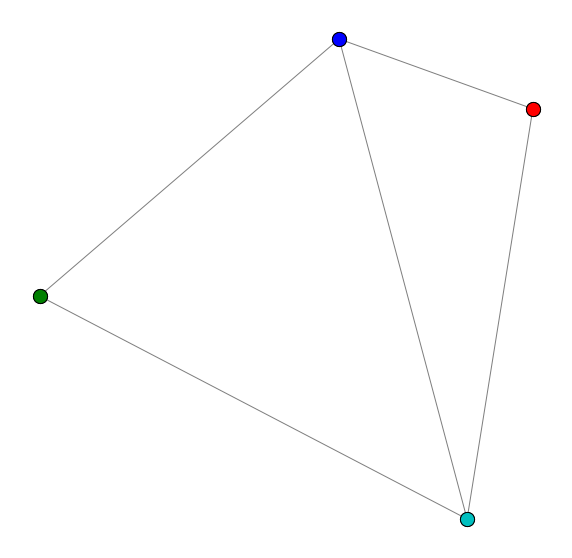

In [33]:
from cdlib import viz
viz.plot_community_graph(g, info_coms, figsize=(10, 10))

<a id="fitness"></a>
### Clustering Evaluation (Fitness functions) ([to top](#top))

After having obtained a network clustering we can compute several indexes upon it. 

For a same index it is possible to obtain a synthetic representation of its min/max/mean/std values

### Leiden
Clustering Evaluation (Fitness functions)

In [34]:
leiden_fit=leiden_coms.average_internal_degree()
leiden_fit


FitnessResult(min=1.3333333333333333, max=8.517616912235747, score=2.5381450796414455, std=1.470630528844867)

as well as its communitiy-wise value

In [35]:
print('Average Internal grade comunities with Leiden \n')
Leiden_in_degree=leiden_coms.average_internal_degree(summary=False)
Leiden_in_degree

Average Internal grade comunities with Leiden 



[8.517616912235747,
 4.847373188405797,
 4.732429718875502,
 5.257799671592775,
 5.457567185289958,
 5.4356060606060606,
 3.4035567715458277,
 2.62111801242236,
 2.459869848156182,
 2.3774403470715835,
 3.306024096385542,
 2.9902912621359223,
 2.4242424242424243,
 4.255102040816326,
 2.140845070422535,
 2.2,
 2.1481481481481484,
 2.75,
 2.533333333333333,
 2.4615384615384617,
 3.3333333333333335,
 1.8,
 1.8,
 1.8,
 1.7777777777777777,
 2.0,
 4.857142857142857,
 1.7142857142857142,
 1.6666666666666667,
 1.6666666666666667,
 1.6666666666666667,
 1.6,
 1.6,
 1.6,
 1.6,
 2.8,
 1.6,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.3333333333333333,
 1.3333333333333333,
 1.3333333333333333,
 1.3333333333333333,
 1.3333333333333333]

Fitness scores can also be instantiated at library level

For the complete list of implemented fitness functions, refer to the online [documentation](https://cdlib.readthedocs.io/en/latest/reference/evaluation.html).

### Louvain
Clustering Evaluation (Fitness functions)

In [36]:
louv_fit=louv_coms.average_internal_degree()
louv_fit

FitnessResult(min=0.0, max=8.105049685662138, score=0.5798608079553567, std=1.2127406541859815)

In [37]:
print('Average Internal grade comunities with Louvain \n')
louv_in_degree=louv_coms.average_internal_degree(summary=False)
louv_in_degree

Average Internal grade comunities with Louvain 



[4.231638418079096,
 8.105049685662138,
 4.24760136180749,
 5.150094996833439,
 6.1890581717451525,
 5.287903225806452,
 3.3607038123167157,
 2.461206896551724,
 2.6005830903790086,
 2.3197278911564627,
 2.3835616438356166,
 2.375,
 2.10989010989011,
 2.606060606060606,
 2.1587301587301586,
 2.2580645161290325,
 2.1538461538461537,
 1.894736842105263,
 2.918918918918919,
 2.230769230769231,
 2.1176470588235294,
 1.8823529411764706,
 1.6,
 2.8,
 2.2857142857142856,
 1.8571428571428572,
 4.0,
 1.8461538461538463,
 1.8461538461538463,
 1.7777777777777777,
 2.0,
 1.7142857142857142,
 1.7142857142857142,
 2.0,
 1.2,
 1.6,
 1.5,
 1.5,
 1.5,
 1.3333333333333333,
 1.3333333333333333,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.

### Label Propagation
Clustering Evaluation (Fitness functions)

In [38]:
lp_fit=lp_coms.average_internal_degree()
lp_fit

FitnessResult(min=1.0, max=9.242867593269935, score=1.4314826670505014, std=0.6700390659451055)

In [39]:
print('Average Internal grade comunities with Label Propagation \n')
lp_in_degree=lp_coms.average_internal_degree(summary=False)
lp_in_degree

Average Internal grade comunities with Label Propagation 



[7.762101498427576,
 9.242867593269935,
 2.6545454545454548,
 5.466666666666667,
 2.0,
 1.9615384615384615,
 2.0,
 1.9583333333333333,
 1.9583333333333333,
 2.1666666666666665,
 1.9555555555555555,
 1.9523809523809523,
 2.0526315789473686,
 3.1666666666666665,
 1.9375,
 1.9375,
 2.129032258064516,
 2.7096774193548385,
 2.2222222222222223,
 2.6666666666666665,
 1.9230769230769231,
 2.6315789473684212,
 1.894736842105263,
 1.8888888888888888,
 1.8888888888888888,
 4.222222222222222,
 1.8888888888888888,
 1.875,
 2.125,
 1.875,
 1.875,
 2.875,
 1.8666666666666667,
 2.2857142857142856,
 1.8571428571428572,
 1.8571428571428572,
 1.8571428571428572,
 1.8571428571428572,
 2.7142857142857144,
 3.076923076923077,
 1.8461538461538463,
 1.8333333333333333,
 1.8333333333333333,
 3.5,
 1.8333333333333333,
 2.8333333333333335,
 3.3333333333333335,
 1.8181818181818181,
 1.8181818181818181,
 2.0,
 1.8181818181818181,
 3.090909090909091,
 2.3636363636363638,
 3.090909090909091,
 2.5454545454545454,
 1.

### Infomap

Clustering Evaluation (Fitness functions)


In [40]:
info_fit=lp_coms.average_internal_degree()
info_fit

FitnessResult(min=1.0, max=9.242867593269935, score=1.4314826670505014, std=0.6700390659451055)

In [41]:
print('Average Internal grade comunities with Infomap \n')
lp_in_degree=lp_coms.average_internal_degree(summary=False)
lp_in_degree

Average Internal grade comunities with Infomap 



[7.762101498427576,
 9.242867593269935,
 2.6545454545454548,
 5.466666666666667,
 2.0,
 1.9615384615384615,
 2.0,
 1.9583333333333333,
 1.9583333333333333,
 2.1666666666666665,
 1.9555555555555555,
 1.9523809523809523,
 2.0526315789473686,
 3.1666666666666665,
 1.9375,
 1.9375,
 2.129032258064516,
 2.7096774193548385,
 2.2222222222222223,
 2.6666666666666665,
 1.9230769230769231,
 2.6315789473684212,
 1.894736842105263,
 1.8888888888888888,
 1.8888888888888888,
 4.222222222222222,
 1.8888888888888888,
 1.875,
 2.125,
 1.875,
 1.875,
 2.875,
 1.8666666666666667,
 2.2857142857142856,
 1.8571428571428572,
 1.8571428571428572,
 1.8571428571428572,
 1.8571428571428572,
 2.7142857142857144,
 3.076923076923077,
 1.8461538461538463,
 1.8333333333333333,
 1.8333333333333333,
 3.5,
 1.8333333333333333,
 2.8333333333333335,
 3.3333333333333335,
 1.8181818181818181,
 1.8181818181818181,
 2.0,
 1.8181818181818181,
 3.090909090909091,
 2.3636363636363638,
 3.090909090909091,
 2.5454545454545454,
 1.

<a id="comparison"></a>
### Clustering Evaluation (Comparison) ([to top](#top))

When multiple clustering have been computed on a same network it is useful to measure their resemblance.

``CDlib`` allows to do so by exposing several clustering resemblance scores, each one of them tailored to support specific kind of network clusterings (crisp/partition, complete/partial node coverage).

As for the fitness functions, resemblance scores can be instantiated at the community level as well as at the library level.

In [42]:
from cdlib import evaluation
evaluation.normalized_mutual_information(leiden_coms,louv_coms)

MatchingResult(score=0.49750667412604327, std=None)

In [43]:
evaluation.normalized_mutual_information(leiden_coms, lp_coms)


MatchingResult(score=0.4297394249319483, std=None)

In [44]:
evaluation.normalized_mutual_information(louv_coms,info_coms)

MatchingResult(score=0.07247160629596058, std=None)

<a id="visualization"></a>
### Community/Statistics Visualization ([to top](#top))

``CDlib`` allows to generate two families of predefined plots:
- network/community visualizations
- community fitness/comparison visualizations

### Graph visualization

One way to visualize the communities identified on a graph is by coloring graph nodes accordingly.<br>
Every node is a community with different internal degree


Figure 1 Communities with Leiden 

Figure 2 Communities with Louvain 

Figure 3 Communities with Label Propagation 

Figure 4 Communities with Infomap 



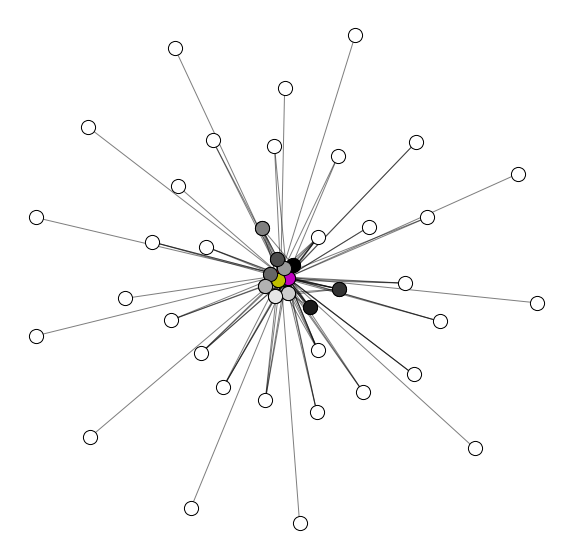

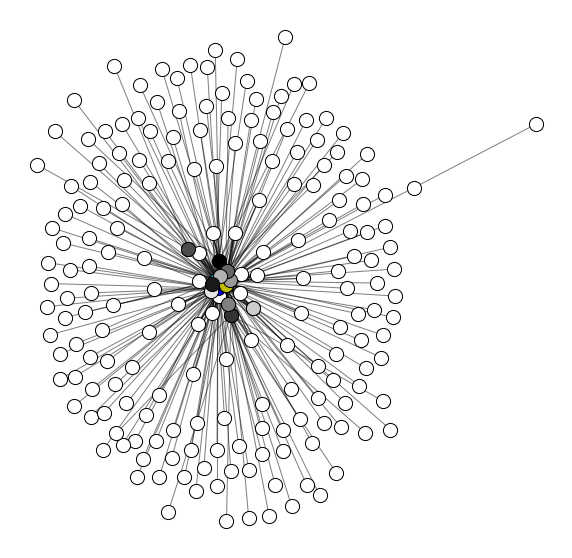

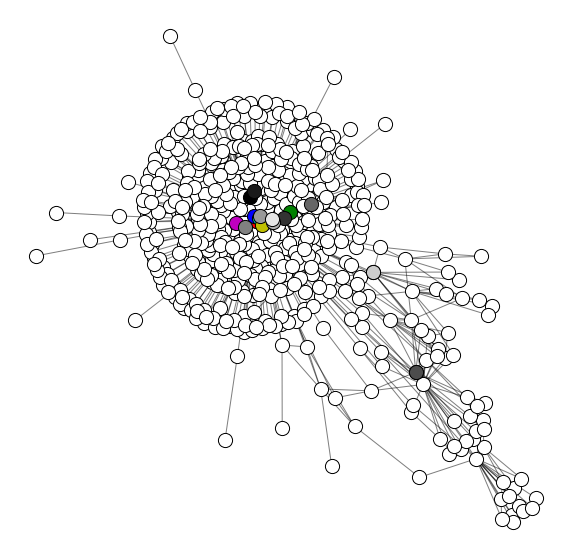

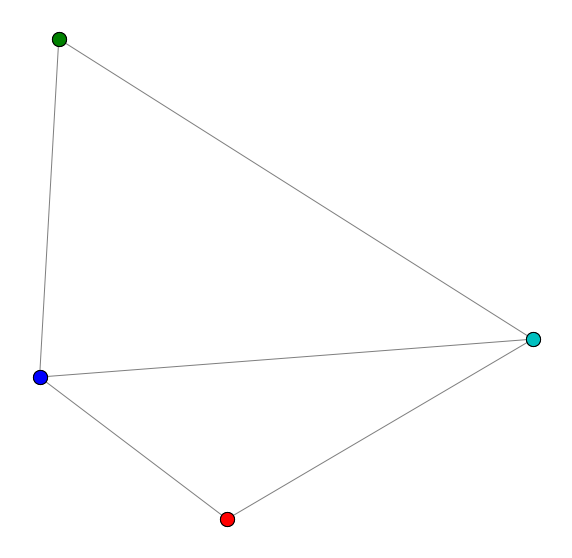

In [56]:
from cdlib import viz

coms=[leiden_coms,louv_coms,lp_coms, info_coms]

for i in range(len(coms)):
    print('Figure',i+1,'Communities with',coms[i].method_name ,'\n')
    viz.plot_community_graph(g,coms[i], figsize=(10, 10))
     

### Plot the communities  top_k=10 and with label

Figure 1 Communities with Leiden 

Figure 2 Communities with Louvain 

Figure 3 Communities with Label Propagation 

Figure 4 Communities with Infomap 



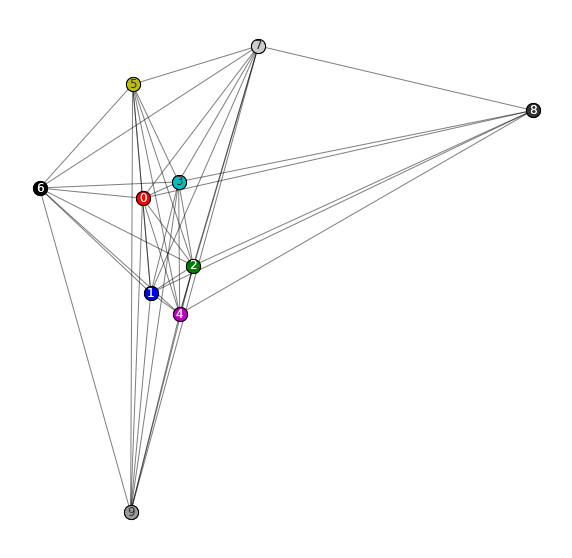

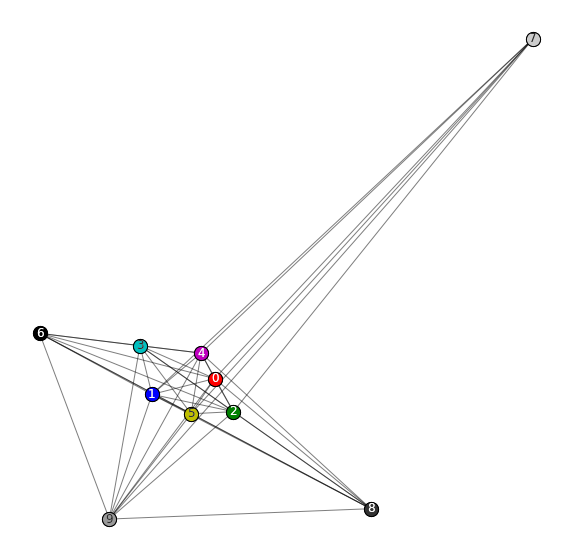

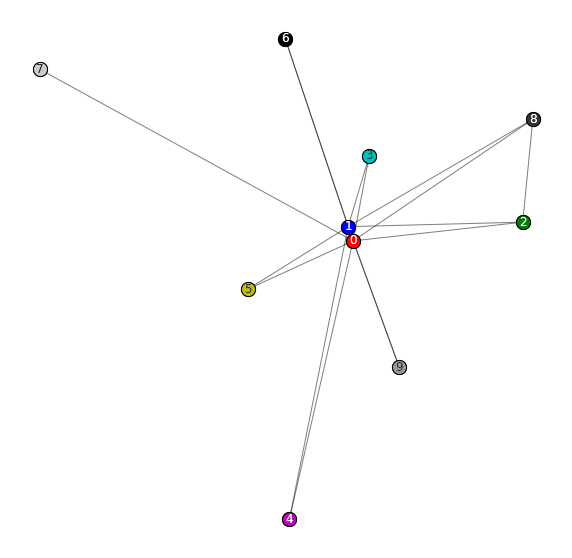

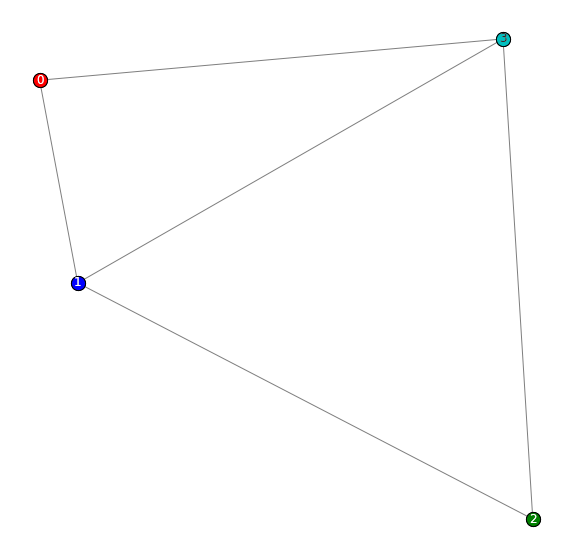

In [57]:

for i in range(len(coms)):
    
    print('Figure',i+1,'Communities with',coms[i].method_name ,'\n')
    viz.plot_community_graph(g,coms[i], figsize=(10, 10),
                        plot_labels=True,top_k=10)


Such strategy is feasible when the network is small enogh. In case of medium size graphs an alternative is collapsing all community nodes into a single met-node and visualize the resulting community graph:

### Community fitness/comparison visualization

Given one (or more) clustering it could be useful to visualize how a given fitness function distributes over the communities.

A nice way to do so is by using violin plots.

In [58]:
from cdlib import viz

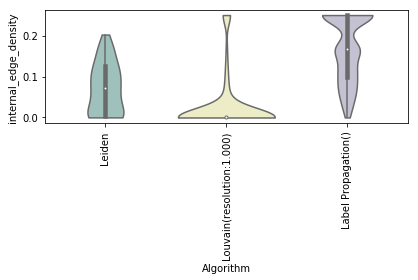

In [59]:
viz.plot_com_stat([leiden_coms,louv_coms, lp_coms],evaluation.internal_edge_density)

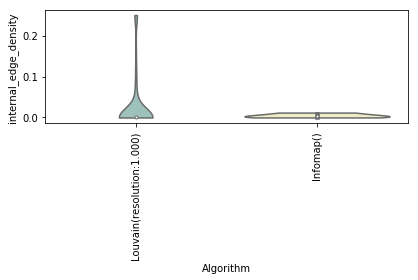

In [60]:
viz.plot_com_stat([louv_coms, info_coms],evaluation.internal_edge_density)

Another simple visualization type that allows getting a few insights on community characteristics is the scatter plot.

We can easily pair-wise compare fitness functions for one or more clustering as follows:

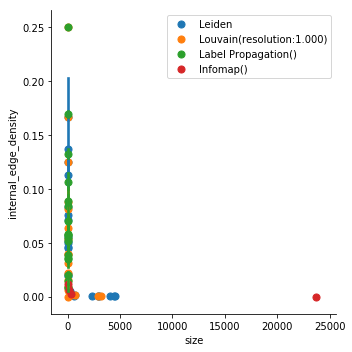

In [61]:
viz.plot_com_properties_relation([leiden_coms,louv_coms, lp_coms,info_coms], evaluation.size, evaluation.internal_edge_density)

<a id="qualitative"></a>
### Qualitative evaluation ([to top](#top))

Another way to validate a clustering is to analyse the purity of each community w.r.t. an external attribute.

In our example, let's consider the Houses of GoT characters: what's the CD approach among the tested ones that allows to identify more "homogeneous" clusters?

In [62]:
# Modularity evaluation
from cdlib import evaluation
leiden_mod=evaluation.erdos_renyi_modularity(g,leiden_coms)
louv_mod=evaluation.erdos_renyi_modularity(g,louv_coms)
lp_mod=evaluation.erdos_renyi_modularity(g,lp_coms)
info_mod=evaluation.erdos_renyi_modularity(g,info_coms)
print('Leiden Mod\n',leiden_mod,'\n')
print('Louv Mod\n',louv_mod,'\n')
print('Label Propagation Mod\n',lp_mod,'\n')
print('Infomap Mod\n',info_mod, '\n')


Leiden Mod
 FitnessResult(min=None, max=None, score=0.5104226729427918, std=None) 

Louv Mod
 FitnessResult(min=None, max=None, score=0.48173260606344964, std=None) 

Label Propagation Mod
 FitnessResult(min=None, max=None, score=0.39864697359999074, std=None) 

Infomap Mod
 FitnessResult(min=None, max=None, score=0.03583767930254638, std=None) 



### Compare the clusters


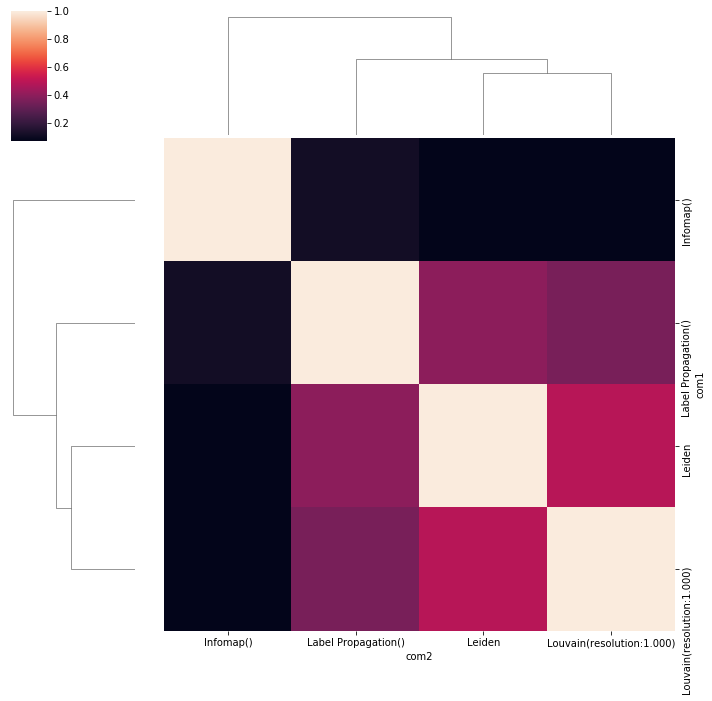

In [63]:
from cdlib import algorithms, viz, evaluation

clustermap = viz.plot_sim_matrix([leiden_coms,louv_coms, lp_coms,info_coms],evaluation.adjusted_mutual_information)

<a id="gt"></a>
### Ground Truth evaluation ([to top](#top))

Let assume we want to compare different clusterings over a set of network ground truth partitions.

In order to obtain a more interesting example, we can generate a few synthetic graphs with planted ground truth clusterings and perform CD upon them. <br/> We can easily visually compare their resuls as follows:

In [65]:
from cdlib import NodeClustering
from networkx.generators.community import LFR_benchmark_graph



g1 = LFR_benchmark_graph(g.number_of_nodes(), 3, 1.5, 0.5, min_community=20, average_degree=5)
g2 = LFR_benchmark_graph(g.number_of_nodes(), 3, 1.5, 0.6, min_community=20, average_degree=5)
g3 = LFR_benchmark_graph(g.number_of_nodes(), 3, 1.5, 0.7, min_community=20, average_degree=5)

names = ["g1", "g2", "g3"]
graphs = [g1, g2, g3]
references = []

# building the NodeClustering ground truth for the graphs
for g in graphs:
    ground_truth = NodeClustering(communities={frozenset(g.nodes[v]['community']) for v in g}, graph=g, method_name="reference")
    references.append(ground_truth)
    
algos = [algorithms.leiden,algorithms.louvain, algorithms.label_propagation]

# Computing the visualization (2 execution per method, NMI as scoring for ground truth resemblance)
viz.plot_scoring(graphs, references, names, algos, scoring=evaluation.adjusted_mutual_information, nbRuns=2)

KeyboardInterrupt: 

Finally, we can also compare different clustering obtained on the same graph by alternative algorithms among them. <br/>
Let's get back to our initial Karate Club graph and compute a few more clusterings upon it:

In [ ]:
mod = coms.newman_girvan_modularity(g,lieden_coms)

## ANALYSIS OF THE TOP TEN COMMUNITIES 